# Lotto Belgium

- All the winning combinations of the Belgian Lotto since 2000 until 2024

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lotto-2000-2024.csv", encoding='latin1')
df.columns = ['Date', 'Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5', 'Number 6', 'Bonus']


# Просмотр первых нескольких строк данных
df.head()


,Date,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6,Bonus
0,2000-12-30,11,12,19,21,29,31,38
1,2000-12-27,4,6,10,15,32,38,17
2,2000-12-23,4,8,28,35,39,41,17
3,2000-12-20,4,19,26,34,35,40,25
4,2000-12-16,4,12,16,32,36,41,39


In [47]:
def even(func):
    def wrapper(num):
        return func(num) % 2 == 0
    return wrapper

@even
def even_int(num):
    if num % 2 == 0:
        return 1
    return 0


In [50]:
def count_even(row):
    return even_int(row['Number 1']) + even_int(row['Number 2']) + even_int(row['Number 3']) + even_int(row['Number 4']) + even_int(row['Number 5']) + even_int(row['Number 6']) + even_int(row['Bonus'])


In [54]:
df['NbEven'] = df.apply(count_even, axis=1)
df['NbOdd'] = 7 - df['NbEven']

df.head()

,Date,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6,Bonus,NbEven,NbOdd
0,2000-12-30,11,12,19,21,29,31,38,5,2
1,2000-12-27,4,6,10,15,32,38,17,2,5
2,2000-12-23,4,8,28,35,39,41,17,4,3
3,2000-12-20,4,19,26,34,35,40,25,3,4
4,2000-12-16,4,12,16,32,36,41,39,2,5


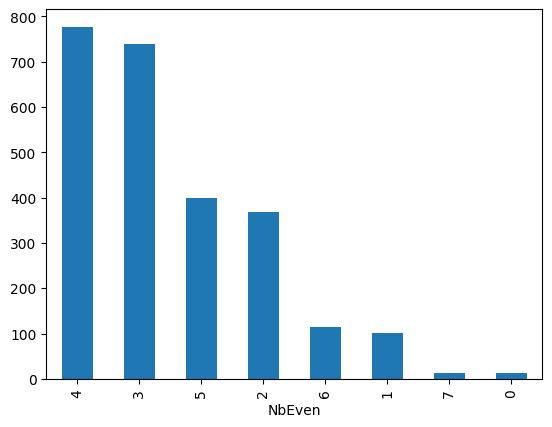

In [56]:
fig, ax = plt.subplots()
_ = df['NbEven'].value_counts().plot(ax=ax, kind='bar')


In [63]:
# Function to check if a number is even
def is_even(num):
    return num % 2 == 0

# Function to count the number of even and odd numbers
def count_even(row):
    even_count = sum(map(lambda x: is_even(x), row[['Number 1', 'Number 2', 'Number 3', 'Number 4', 'Number 5', 'Number 6']]))
    return even_count, 6 - even_count

# Applying the function to the DataFrame
df[['Even Count', 'Odd Count']] = df.apply(count_even, axis=1, result_type='expand')

# Counting the number of draws where all numbers are even
all_even = df[df['Even Count'] == 6].shape[0]

# Output the result
print("Number of draws where all numbers are even:", all_even)


Number of draws where all numbers are even: 34


In [65]:
# Applying the function to the DataFrame
df[['Even Count', 'Odd Count']] = df.apply(count_even, axis=1, result_type='expand')

# Calculating the average number of even and odd numbers in each draw
average_even_count = round(df['Even Count'].mean(), 2)
average_odd_count = round(df['Odd Count'].mean(), 2)

# Counting the number of winning combinations where all numbers are even
all_even = df[(df['Even Count'] == 6)].shape[0]

# Output the results
print("Average number of even numbers in each draw:", average_even_count)
print("Average number of odd numbers in each draw:", average_odd_count)
print("Number of winning combinations where all numbers are even:", all_even)


Average number of even numbers in each draw: 2.98
Average number of odd numbers in each draw: 3.02
Number of winning combinations where all numbers are even: 34


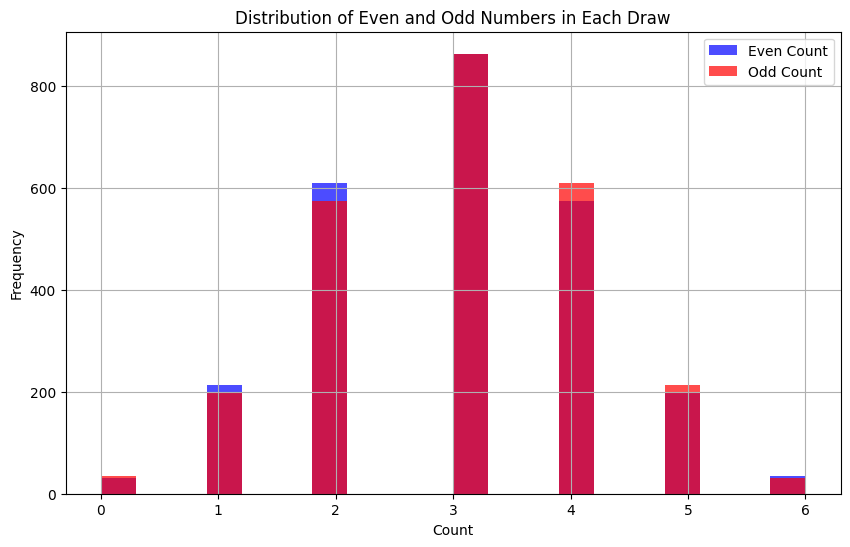

In [66]:
# Histogram for the distribution of average even and odd numbers in each draw
plt.figure(figsize=(10, 6))
plt.hist(df['Even Count'], bins=20, alpha=0.7, color='blue', label='Even Count')
plt.hist(df['Odd Count'], bins=20, alpha=0.7, color='red', label='Odd Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Even and Odd Numbers in Each Draw')
plt.legend()
plt.grid(True)
plt.show()

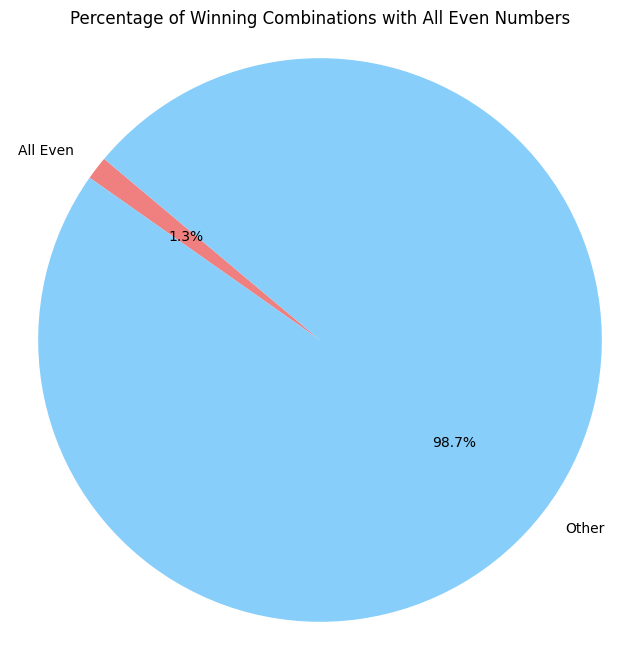

In [67]:
# Pie chart for the percentage of winning combinations where all numbers are even
labels = ['All Even', 'Other']
sizes = [all_even, df.shape[0] - all_even]
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Winning Combinations with All Even Numbers')
plt.axis('equal')
plt.show()